In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
data_df = pd.read_csv("breastcancer.csv")
data_df.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chromation,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


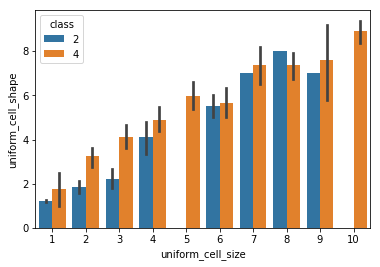

In [3]:
sns.barplot(data=data_df, x='uniform_cell_size', y='uniform_cell_shape', hue='class')

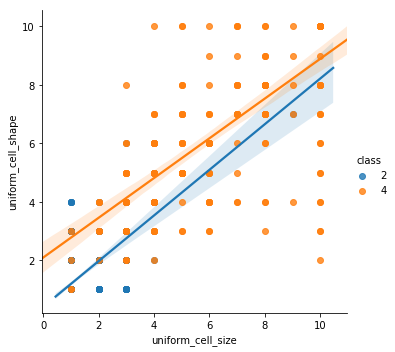

In [4]:
sns.lmplot(data=data_df, x='uniform_cell_size', y='uniform_cell_shape', hue='class')

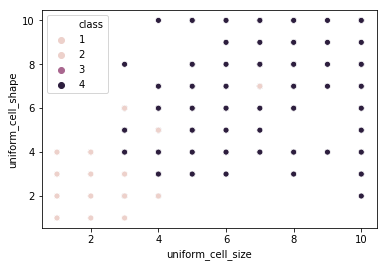

In [5]:
sns.scatterplot(data=data_df, x='uniform_cell_size', y='uniform_cell_shape', hue='class')

In [6]:
data_label = data_df['class']
data_features = data_df.drop('class',1)
data_features = data_features.drop('id',1)

In [7]:
data_features.replace('?', -99999, inplace=True)

In [8]:
label  = []
for num in data_label:
    if num==2:
        label.append([1,0])
    elif num==4:
        label.append([0,1])

In [9]:
feature = np.array(data_features)
label = np.array(label)

In [10]:
feature.shape

(699, 9)

In [11]:
label.shape

(699, 2)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=47)
x_train.shape

(559, 9)

In [13]:
model = Sequential()

In [14]:
model.add(Dense(500, input_dim=9, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(feature, label, epochs=500, batch_size=70, validation_data=(x_train,y_train))

Instructions for updating:
Use tf.cast instead.
Train on 699 samples, validate on 559 samples
Epoch 1/500
699/699 [==============================] - 1s 851us/step - loss: 0.2173 - acc: 0.6495 - val_loss: 0.1573 - val_acc: 0.9714
Epoch 2/500
699/699 [==============================] - 0s 101us/step - loss: 0.1130 - acc: 0.9499 - val_loss: 0.0789 - val_acc: 0.9231
Epoch 3/500
699/699 [==============================] - 0s 93us/step - loss: 0.0603 - acc: 0.9614 - val_loss: 0.0459 - val_acc: 0.9642
Epoch 4/500
699/699 [==============================] - 0s 93us/step - loss: 0.0389 - acc: 0.9599 - val_loss: 0.0362 - val_acc: 0.9624
Epoch 5/500
699/699 [==============================] - 0s 83us/step - loss: 0.0319 - acc: 0.9685 - val_loss: 0.0330 - val_acc: 0.9678
Epoch 6/500
699/699 [==============================] - 0s 77us/step - loss: 0.0283 - acc: 0.9657 - val_loss: 0.0312 - val_acc: 0.9624
Epoch 7/500
699/699 [==============================] - 0s 80us/step - loss: 0.0267 - acc: 0.9671 - v

699/699 [==============================] - 0s 97us/step - loss: 0.0214 - acc: 0.9757 - val_loss: 0.0244 - val_acc: 0.9732
Epoch 60/500
699/699 [==============================] - 0s 83us/step - loss: 0.0213 - acc: 0.9771 - val_loss: 0.0241 - val_acc: 0.9714
Epoch 61/500
699/699 [==============================] - 0s 66us/step - loss: 0.0216 - acc: 0.9742 - val_loss: 0.0241 - val_acc: 0.9696
Epoch 62/500
699/699 [==============================] - 0s 61us/step - loss: 0.0224 - acc: 0.9728 - val_loss: 0.0247 - val_acc: 0.9714
Epoch 63/500
699/699 [==============================] - 0s 86us/step - loss: 0.0217 - acc: 0.9757 - val_loss: 0.0242 - val_acc: 0.9750
Epoch 64/500
699/699 [==============================] - 0s 87us/step - loss: 0.0215 - acc: 0.9771 - val_loss: 0.0240 - val_acc: 0.9714
Epoch 65/500
699/699 [==============================] - 0s 83us/step - loss: 0.0213 - acc: 0.9742 - val_loss: 0.0242 - val_acc: 0.9714
Epoch 66/500
699/699 [==============================] - 0s 93us/step

699/699 [==============================] - 0s 75us/step - loss: 0.0206 - acc: 0.9757 - val_loss: 0.0234 - val_acc: 0.9714
Epoch 120/500
699/699 [==============================] - 0s 65us/step - loss: 0.0202 - acc: 0.9771 - val_loss: 0.0231 - val_acc: 0.9750
Epoch 121/500
699/699 [==============================] - 0s 69us/step - loss: 0.0207 - acc: 0.9757 - val_loss: 0.0234 - val_acc: 0.9714
Epoch 122/500
699/699 [==============================] - 0s 79us/step - loss: 0.0206 - acc: 0.9742 - val_loss: 0.0232 - val_acc: 0.9714
Epoch 123/500
699/699 [==============================] - 0s 82us/step - loss: 0.0203 - acc: 0.9785 - val_loss: 0.0231 - val_acc: 0.9767
Epoch 124/500
699/699 [==============================] - 0s 82us/step - loss: 0.0210 - acc: 0.9742 - val_loss: 0.0229 - val_acc: 0.9750
Epoch 125/500
699/699 [==============================] - 0s 101us/step - loss: 0.0215 - acc: 0.9742 - val_loss: 0.0236 - val_acc: 0.9732
Epoch 126/500
699/699 [==============================] - 0s 9

699/699 [==============================] - 0s 75us/step - loss: 0.0194 - acc: 0.9771 - val_loss: 0.0217 - val_acc: 0.9750
Epoch 180/500
699/699 [==============================] - 0s 74us/step - loss: 0.0196 - acc: 0.9785 - val_loss: 0.0218 - val_acc: 0.9767
Epoch 181/500
699/699 [==============================] - 0s 79us/step - loss: 0.0200 - acc: 0.9771 - val_loss: 0.0217 - val_acc: 0.9750
Epoch 182/500
699/699 [==============================] - 0s 67us/step - loss: 0.0199 - acc: 0.9757 - val_loss: 0.0222 - val_acc: 0.9732
Epoch 183/500
699/699 [==============================] - 0s 87us/step - loss: 0.0190 - acc: 0.9800 - val_loss: 0.0222 - val_acc: 0.9732
Epoch 184/500
699/699 [==============================] - 0s 84us/step - loss: 0.0195 - acc: 0.9757 - val_loss: 0.0218 - val_acc: 0.9750
Epoch 185/500
699/699 [==============================] - 0s 77us/step - loss: 0.0195 - acc: 0.9800 - val_loss: 0.0217 - val_acc: 0.9767
Epoch 186/500
699/699 [==============================] - 0s 72

699/699 [==============================] - 0s 69us/step - loss: 0.0182 - acc: 0.9800 - val_loss: 0.0203 - val_acc: 0.9767
Epoch 240/500
699/699 [==============================] - 0s 64us/step - loss: 0.0184 - acc: 0.9785 - val_loss: 0.0202 - val_acc: 0.9785
Epoch 241/500
699/699 [==============================] - 0s 86us/step - loss: 0.0186 - acc: 0.9814 - val_loss: 0.0204 - val_acc: 0.9750
Epoch 242/500
699/699 [==============================] - 0s 87us/step - loss: 0.0182 - acc: 0.9785 - val_loss: 0.0202 - val_acc: 0.9785
Epoch 243/500
699/699 [==============================] - 0s 69us/step - loss: 0.0187 - acc: 0.9785 - val_loss: 0.0223 - val_acc: 0.9714
Epoch 244/500
699/699 [==============================] - 0s 71us/step - loss: 0.0185 - acc: 0.9771 - val_loss: 0.0202 - val_acc: 0.9767
Epoch 245/500
699/699 [==============================] - 0s 88us/step - loss: 0.0188 - acc: 0.9771 - val_loss: 0.0209 - val_acc: 0.9750
Epoch 246/500
699/699 [==============================] - 0s 86

699/699 [==============================] - 0s 74us/step - loss: 0.0172 - acc: 0.9800 - val_loss: 0.0184 - val_acc: 0.9803
Epoch 300/500
699/699 [==============================] - 0s 75us/step - loss: 0.0176 - acc: 0.9814 - val_loss: 0.0188 - val_acc: 0.9821
Epoch 301/500
699/699 [==============================] - 0s 75us/step - loss: 0.0165 - acc: 0.9828 - val_loss: 0.0191 - val_acc: 0.9785
Epoch 302/500
699/699 [==============================] - 0s 84us/step - loss: 0.0168 - acc: 0.9828 - val_loss: 0.0183 - val_acc: 0.9785
Epoch 303/500
699/699 [==============================] - 0s 91us/step - loss: 0.0166 - acc: 0.9814 - val_loss: 0.0187 - val_acc: 0.9785
Epoch 304/500
699/699 [==============================] - 0s 86us/step - loss: 0.0165 - acc: 0.9828 - val_loss: 0.0182 - val_acc: 0.9803
Epoch 305/500
699/699 [==============================] - 0s 69us/step - loss: 0.0169 - acc: 0.9843 - val_loss: 0.0187 - val_acc: 0.9803
Epoch 306/500
699/699 [==============================] - 0s 86

699/699 [==============================] - 0s 67us/step - loss: 0.0154 - acc: 0.9843 - val_loss: 0.0166 - val_acc: 0.9857
Epoch 360/500
699/699 [==============================] - 0s 67us/step - loss: 0.0152 - acc: 0.9843 - val_loss: 0.0166 - val_acc: 0.9857
Epoch 361/500
699/699 [==============================] - 0s 77us/step - loss: 0.0156 - acc: 0.9857 - val_loss: 0.0177 - val_acc: 0.9803
Epoch 362/500
699/699 [==============================] - 0s 79us/step - loss: 0.0159 - acc: 0.9828 - val_loss: 0.0176 - val_acc: 0.9821
Epoch 363/500
699/699 [==============================] - 0s 73us/step - loss: 0.0163 - acc: 0.9828 - val_loss: 0.0190 - val_acc: 0.9767
Epoch 364/500
699/699 [==============================] - 0s 76us/step - loss: 0.0167 - acc: 0.9800 - val_loss: 0.0164 - val_acc: 0.9857
Epoch 365/500
699/699 [==============================] - 0s 73us/step - loss: 0.0154 - acc: 0.9843 - val_loss: 0.0164 - val_acc: 0.9857
Epoch 366/500
699/699 [==============================] - 0s 81

699/699 [==============================] - 0s 89us/step - loss: 0.0143 - acc: 0.9857 - val_loss: 0.0146 - val_acc: 0.9857
Epoch 420/500
699/699 [==============================] - 0s 74us/step - loss: 0.0159 - acc: 0.9814 - val_loss: 0.0149 - val_acc: 0.9857
Epoch 421/500
699/699 [==============================] - 0s 84us/step - loss: 0.0155 - acc: 0.9843 - val_loss: 0.0172 - val_acc: 0.9839
Epoch 422/500
699/699 [==============================] - 0s 87us/step - loss: 0.0143 - acc: 0.9857 - val_loss: 0.0160 - val_acc: 0.9839
Epoch 423/500
699/699 [==============================] - 0s 85us/step - loss: 0.0144 - acc: 0.9857 - val_loss: 0.0160 - val_acc: 0.9857
Epoch 424/500
699/699 [==============================] - 0s 80us/step - loss: 0.0152 - acc: 0.9843 - val_loss: 0.0146 - val_acc: 0.9857
Epoch 425/500
699/699 [==============================] - 0s 96us/step - loss: 0.0141 - acc: 0.9871 - val_loss: 0.0148 - val_acc: 0.9857
Epoch 426/500
699/699 [==============================] - 0s 74

699/699 [==============================] - 0s 75us/step - loss: 0.0123 - acc: 0.9886 - val_loss: 0.0133 - val_acc: 0.9875
Epoch 480/500
699/699 [==============================] - 0s 75us/step - loss: 0.0122 - acc: 0.9886 - val_loss: 0.0133 - val_acc: 0.9875
Epoch 481/500
699/699 [==============================] - 0s 84us/step - loss: 0.0121 - acc: 0.9886 - val_loss: 0.0133 - val_acc: 0.9875
Epoch 482/500
699/699 [==============================] - 0s 82us/step - loss: 0.0125 - acc: 0.9886 - val_loss: 0.0135 - val_acc: 0.9875
Epoch 483/500
699/699 [==============================] - 0s 93us/step - loss: 0.0129 - acc: 0.9886 - val_loss: 0.0140 - val_acc: 0.9875
Epoch 484/500
699/699 [==============================] - 0s 85us/step - loss: 0.0122 - acc: 0.9886 - val_loss: 0.0134 - val_acc: 0.9875
Epoch 485/500
699/699 [==============================] - 0s 70us/step - loss: 0.0121 - acc: 0.9886 - val_loss: 0.0135 - val_acc: 0.9875
Epoch 486/500
699/699 [==============================] - 0s 91

In [16]:
predict1 = np.array(x_train[0])